# This is Predicting the NBA's MVP Voting Part 1:

## Web scraping of NBA Stats from basketball-reference.com

Most Valuable Player (MVP) voting occurs each season (year) in the NBA league, in this project we'll create a dataset and make it ready to apply a machine learning (ML) algorithm that will help us predict the results of the MVP voting based on the player and team statistics.

This project is an end-to-end project that will show the use of web scraping, data cleaning as well as ML techniques and libraries, to get and produce a dataset that is relevant to a predictive question, followed by data cleaning, manipulation, and prediction.

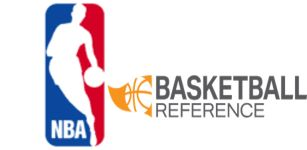


**To complete part 1 of this project, we need to decide which data can best help us in this predictive task, in this case, we will go for:**

1. **The MVP voting table for each season**, starting 1991 - This, among others, will be used to get the target column for training the algorithm and making our predictions.

   (We'll download the relevant pages using the "requests" library and collect the relevant table using BeautifullSoup and Pandas).

2. **The player statistics per game table for each season**, starting 1991 - this is the main source the voting relies on.

   (We'll download the relevant pages using the Selenium library and with a javascript command, and collect the relevant table using BeautifullSoup and Pandas).

3. **The team records per year table for each season**, starting 1991 - this will help us to address the question of the team the player has played for in that season is a factor.

   (We'll download the relevant pages using the "requests" library and collect the relevant table using BeautifullSoup and Pandas).

## 1. Downloading MVP voting tables

In [74]:
import requests

In [79]:
years = list(range(1991, 2023))

In [76]:
#This is the url of the page we want to scrape, the year 2020 at the end was replaced with {} to enter our range of years instead:

url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

In [77]:
#Now let's loop through the list of years and use the url to scrape the data:
import requests

for year in years:
    url = url_start.format(year)
    data = requests.get(url)

    with open("mvp/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)
    


In [78]:
from bs4 import BeautifulSoup

In [33]:
with open("mvp/1991.html", encoding="utf-8") as f:
    page = f.read()

In [34]:
soup = BeautifulSoup(page, "html.parser")

In [35]:
soup.find('tr', class_="over_header").decompose() #remove table rows which are tr's of class over_header.

In [36]:
mvp_table = soup.find(id='mvp')

In [37]:
import pandas as pd

In [38]:
mvp_1991 = pd.read_html(str(mvp_table))[0]

In [39]:
mvp_1991.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225


In [80]:
dfs = []
for year in years:
    with open("mvp/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id='mvp')
    mvp = pd.read_html(str(mvp_table))[0]
    mvp["Year"] = year

    dfs.append(mvp)

In [81]:
mvps = pd.concat(dfs)

In [82]:
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [83]:
mvps.to_csv("mvps.csv")

## 2. Downloading player statistics records

**So far, we've downloaded and parsed the MVP voting data. However, if we're going to predict who is going to be the MVP in a given season, this data isn't enough. We also need the statistics per game for every player in past seasons starting from 1991.**

In [46]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

url = player_stats_url.format(1991)
data = requests.get(url)
with open("player/1991.html", "w+", encoding="utf-8") as f:
    f.write(data.text)

**We see that for the 1991 player stats table we get only 17 rows. To load the entire table, we need to use JavaScript. The requests library assumes that our web browser uses JavaScript to render the rest of the rows after the page is loaded. This isn't happening in our case, so we need to take a different approach.**

To fix the issue we detected on the previous screen, we need to determine how to use the browser to get all of the data.

This is a common problem in web scraping. To solve it, we're going to use a library called **Selenium**.

First, we need to install a driver that enables Python to allow the browser to download the page and render it using the browser's JavaScript execution runner. We'll initialize the driver, tell it to render our URL in the browser, run JavaScript in the browser, tell the browser to wait until the code is executed to scroll down the page, grab the HTML of the table, and write the result in a new file.

In [47]:
from selenium import webdriver

In [48]:
driver = webdriver.Chrome()

In [49]:
import time

url = player_stats_url.format(1991)
driver.get(url)
driver.execute_script("window.scrollTo(1, 10000)")
time.sleep(2)

html = driver.page_source

In [50]:
with open("player/1991.html", "w+", encoding="utf-8") as f:
    f.write(html)

Now insert the above code into a loop to download the same page for all relevant years 

In [51]:
for year in years:
    url = player_stats_url.format(year)
    driver.get(url)
    driver.execute_script("window.scrollTo(1, 10000)") #use driver to execute a javascript to scroll down to get all the page 
    time.sleep(2)

    html = driver.page_source
    with open("player/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(html)
    

In [52]:
dfs = []
for year in years:
    with open("player/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose() #remove table rows which are tr's of class thead
    player_table = soup.find(id="per_game_stats")
    player = pd.read_html(str(player_table))[0]
    player["Year"] = year
    dfs.append(player)

    

In [53]:
players = pd.concat(dfs)

In [54]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [55]:
players.to_csv("players.csv")

## 3. The final step in our process is to get team records per year

This time, we don't have the issue with incomplete table loading, so we don't need to execute JavaScript. Instead, we'll use a very similar approach to the one we applied when downloading MVP voting data.

We'll go to https://www.basketball-reference.com/leagues/NBA_2021_standings.html , which is the league of 2021 standings which specifies the standings per team, and we'll pick the division standings as our scraped data. This consists of 2 tables.

In [66]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [68]:
for year in years:
    url = team_stats_url.format(year)
    data = requests.get(url)

    with open("team/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)
    

Now after downloading the data we need to extract two tables from each page, both from the section on Division Standings: the ones for the Eastern and Western Conferences. For some seasons, there are also other sections with tables, but those require additional data cleaning. Therefore, let's consider only the Division Standings section and grab both tables from it.

In [69]:
dfs = []
for year in years:
    with open("team/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose() #remove table rows which are tr's of class thead
    team_table = soup.find(id="divs_standings_E")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Eastern Conference"]
    del team["Eastern Conference"]
    dfs.append(team)

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose() #remove table rows which are tr's of class thead
    team_table = soup.find(id="divs_standings_W")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Western Conference"]
    del team["Western Conference"]
    dfs.append(team)


In [70]:
teams = pd.concat(dfs)

In [71]:
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs


In [72]:
teams.to_csv("team.csv")

## We've got 3 csv files containing the data for our ML training.

Inspecting the "team.csv" file, we see that we didn't manage to remove all the tr.theads elements and we have a few rows of that in our table.

In the next step of data cleaning, manipulation, and prepping for ML we'll remove those rows. 